In [1]:
#30DayMapChallenge Day 1: Points
#Color = Possession Sequence #
#Size: Duration of Possession by Ind. Player
#Python #JupyterNotebook #dataviz 
#Data Source: @StatsBomb

In [2]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
plt.style.use('fivethirtyeight')
import matplotlib.ticker as ticker
from PIL import Image
import urllib
import time

In [3]:
dforig = pd.read_json('15946.json')

In [4]:
df = dforig
df = df.fillna(0)
df = df.loc[df.location != 0]
#Cleaning up dataset
df = df.drop(columns=['id','tactics', 'related_events', 'counterpress', 'under_pressure',
       'ball_recovery', 'shot', 'goalkeeper', 'duel', 'dribble',
       'foul_committed', 'interception', 'block', 'foul_won', 'bad_behaviour',
       'substitution']).reset_index()
#Separating x and y variables
df['x'] = df['location']
df['y'] = df['location']
for i in range(len(df)):
    df['x'][i] = df.location[i][0]
    df['y'][i] = df.location[i][1]

C:\Users\matan\AppData\Local\Temp/ipykernel_24736/172656490.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'][i] = df.location[i][0]
C:\Users\matan\AppData\Local\Temp/ipykernel_24736/172656490.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][i] = df.location[i][1]


In [5]:
#Dataset
df

,level_0,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,team,duration,player,position,location,pass,carry,ball_receipt,x,y
0,4,5,1,2022-12-13 00:00:00.098,0,0,"{'id': 30, 'name': 'Pass'}",2,"{'id': 206, 'name': 'Deportivo Alavés'}","{'id': 9, 'name': 'From Kick Off'}","{'id': 206, 'name': 'Deportivo Alavés'}",1.909000,"{'id': 6581, 'name': 'Jonathan Rodríguez Menén...","{'id': 16, 'name': 'Left Midfield'}","[61.0, 41.0]","{'recipient': {'id': 6855, 'name': 'Guillermo ...",0,0,61.0,41.0
1,5,6,1,2022-12-13 00:00:02.007,0,2,"{'id': 42, 'name': 'Ball Receipt*'}",2,"{'id': 206, 'name': 'Deportivo Alavés'}","{'id': 9, 'name': 'From Kick Off'}","{'id': 206, 'name': 'Deportivo Alavés'}",0.000000,"{'id': 6855, 'name': 'Guillermo Alfonso Maripá...","{'id': 5, 'name': 'Left Center Back'}","[36.0, 26.0]",0,0,0,36.0,26.0
2,6,7,1,2022-12-13 00:00:02.007,0,2,"{'id': 43, 'name': 'Carry'}",2,"{'id': 206, 'name': 'Deportivo Alavés'}","{'id': 9, 'name': 'From Kick Off'}","{'id': 206, 'name': 'Deportivo Alavés'}",1.490000,"{'id': 6855, 'name': 'Guillermo Alfonso Maripá...","{'id': 5, 'name': 'Left Center Back'}","[36.0, 26.0]",0,"{'end_location': [36.0, 29.0]}",0,36.0,26.0
3,7,8,1,2022-12-13 00:00:03.497,0,3,"{'id': 30, 'name': 'Pass'}",2,"{'id': 206, 'name': 'Deportivo Alavés'}","{'id': 9, 'name': 'From Kick Off'}","{'id': 206, 'name': 'Deportivo Alavés'}",3.288000,"{'id': 6855, 'name': 'Guillermo Alfonso Maripá...","{'id': 5, 'name': 'Left Center Back'}","[36.0, 29.0]","{'recipient': {'id': 6613, 'name': 'Rubén Sobr...",0,0,36.0,29.0
4,8,9,1,2022-12-13 00:00:06.785,0,6,"{'id': 42, 'name': 'Ball Receipt*'}",2,"{'id': 206, 'name': 'Deportivo Alavés'}","{'id': 9, 'name': 'From Kick Off'}","{'id': 206, 'name': 'Deportivo Alavés'}",0.000000,"{'id': 6613, 'name': 'Rubén Sobrino Pozuelo'}","{'id': 23, 'name': 'Center Forward'}","[85.0, 73.0]",0,0,"{'outcome': {'id': 9, 'name': 'Incomplete'}}",85.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,3995,3996,2,2022-12-13 00:46:40.487,91,40,"{'id': 42, 'name': 'Ball Receipt*'}",144,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}","{'id': 217, 'name': 'Barcelona'}",0.000000,"{'id': 5503, 'name': 'Lionel Andrés Messi Cucc...","{'id': 17, 'name': 'Right Wing'}","[107.0, 45.0]",0,0,0,107.0,45.0
3934,3996,3997,2,2022-12-13 00:46:40.487,91,40,"{'id': 43, 'name': 'Carry'}",144,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}","{'id': 217, 'name': 'Barcelona'}",2.283652,"{'id': 5503, 'name': 'Lionel Andrés Messi Cucc...","{'id': 17, 'name': 'Right Wing'}","[107.0, 45.0]",0,"{'end_location': [112.0, 34.6]}",0,107.0,45.0
3935,3997,3998,2,2022-12-13 00:46:41.244,91,41,"{'id': 17, 'name': 'Pressure'}",144,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}","{'id': 206, 'name': 'Deportivo Alavés'}",0.525000,"{'id': 6855, 'name': 'Guillermo Alfonso Maripá...","{'id': 5, 'name': 'Left Center Back'}","[13.0, 41.0]",0,0,0,13.0,41.0
3936,3998,3999,2,2022-12-13 00:46:42.770,91,42,"{'id': 16, 'name': 'Shot'}",144,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}","{'id': 217, 'name': 'Barcelona'}",0.497348,"{'id': 5503, 'name': 'Lionel Andrés Messi Cucc...","{'id': 17, 'name': 'Right Wing'}","[112.0, 34.6]",0,0,0,112.0,34.6


In [6]:
#Pulling an individual location
df.location[0]

[61.0, 41.0]

In [7]:
#Listing available columns to view
df.columns

Index(['level_0', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'duration',
       'player', 'position', 'location', 'pass', 'carry', 'ball_receipt', 'x',
       'y'],
      dtype='object')

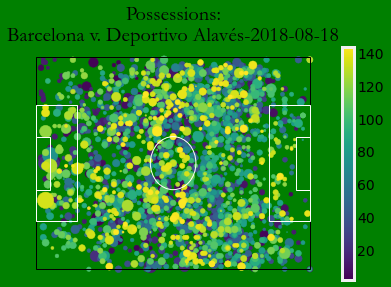

In [8]:
#Creating plot
fig, ax = plt.subplots()
hfont = {'fontname':'Garamond'}
# Giving title to the plot
plt.title("Possessions:\nBarcelona v. Deportivo Alavés-2018-08-18", **hfont)
# Create a Rectangle patch
rect = patches.Rectangle((0, 0), 120, -80, linewidth=1, edgecolor='black', facecolor='none')
rect2 = patches.Rectangle((0,-18), 18, 18-62, linewidth=1, edgecolor='white', facecolor='none')
rect21 = patches.Rectangle((102,-18), 18, 18-62, linewidth=1, edgecolor='white', facecolor='none')
rect3 = patches.Rectangle((0,-30), 6, 30-50, linewidth=1, edgecolor='white', facecolor='none')
rect31 = patches.Rectangle((114,-30), 6, 30-50, linewidth=1, edgecolor='white', facecolor='none')
circ = patches.Circle((60,-40), 10, linewidth=1, edgecolor='white', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect2)
ax.add_patch(rect21)
ax.add_patch(rect3)
ax.add_patch(rect31)
ax.add_patch(circ)
plt.axis('off')
plt.grid('off')
fig.patch.set_facecolor('green')

#Scatters datapoints of all events that occured during the game,
# with color based on which string of possession it was a part of,
# and size equal to the duration of the individual event.
plt.scatter(df.x,0-df.y, c = df.possession, s= 20*df.duration)
plt.colorbar()
plt.show()